**PCD**

# Laboratoire n°4

In [1]:
from matplotlib import pyplot as plt

In [2]:
from sklearn import datasets

## 1 - Description du jeu de données "Olivetti Faces"

### 1.a - Contenu de la structure de donnée retournée par datasets.fetch_olivetti_faces()

In [3]:
faces = datasets.fetch_olivetti_faces()
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
# Mises en commentaires pour éviter d'alourdir ce rapport

#faces['data']
#faces['images']
#faces['target']
faces['DESCR']

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

Il s'agit donc d'un ensemble de données de 3 attributs de données : data, image et target.
L'attribut DESCR le décrit.

D'après cette description justement, cet ensemble contient des images de têtes de personnes, prises entre avril 1992 et avril 1994 au AT&T Laboratories Cambridge qui sont décrites à l'aide des attributs suivant : 

- images : stocke un tableau de tableaux de taille 64x64, dont chaque valeur représente la nuance de gris du pixel correspondant ;

- data   : stocke les mêmes informations que images mais sous la forme d'un seul tableau de 4096 valeurs ;

- target : un entier de 0 à 39 indiquant l'identité de la personne imagée.

### 1.b - Nombre de personnes représentées et nombre d'images par personne

On obtient ces informations d'après la description de ce data set 'DESCR' encore une fois :

Il y a 40 personnes (Classes) représentées et 10 différentes images (Samples) par personne.

### 1.c - Taille des images, leur codage et éventuelles duplications

In [6]:
faces.images.shape

(400, 64, 64)

Les images sont donc représentées sur 3 dimensions, avec 400 valeurs pour la première (nombre d'échantillons) et 64 pour la deuxième et troisième. L'image de chaque échantillon est donc représentée avec un tableau de dimension 64x64.

In [7]:
# Affichage des données pour l'attribut image du premier échantillon
faces.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

Comme stipulé dans la description des données encore une fois, cette image est quantifiée par 256 niveaux de gris, stockés en tant qu'entiers non signés de 8 bits, convertis dans l'intervalle [0,1] pour travailler plus facilement avec de nombreux algorithmes. Elles sont stockées, comme dit précédemment, sous la forme d'un tableau 64x64 dont chaqze composante représente un pixel.

In [8]:
faces.data.shape

(400, 4096)

In [9]:
# Affichage des données pour l'attribut data du premier échantillon
faces.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

Il y a une duplication dans les données de faces ; en effet, images et data stockent les mêmes informations sous différentes formes : images stocke les nuances de gris de chaque pixel sous la forme d'un tableau de tableaux de taille 64x64, alors que data stocke ces mêmes valeurs sous la forme d'un seul tableau de taille 4096.

### 1.d - Affichage d'une image extraite des données

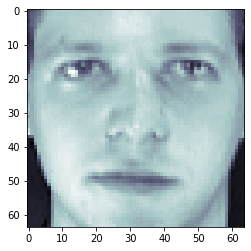

In [10]:
plt.imshow(faces.images[0], cmap=plt.cm.bone)
plt.show()

## 2 - Constitution du jeu d’entraînement et de tests 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    random_state=0, 
                                                    stratify=faces.target,
                                                    train_size=0.8)

In [12]:
X_train.shape

(320, 4096)

320 items et 4096 attributs

In [13]:
X_test.shape

(80, 4096)

80 items et 4096 attributs

In [14]:
y_train.size

320

320 items et 1 attribut

In [15]:
y_test.size

80

80 items et 1 attribut

## 3 - Classification avec différents classifieurs

In [16]:
from sklearn.metrics   import accuracy_score

#### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 87.50%


#### Régression logistique

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none', solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 95.00%


#### SVM

In [19]:
from sklearn.svm           import SVC
from sklearn.pipeline      import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 92.50%


## 4 - Méthode ACP

In [20]:
from sklearn import decomposition

# Construction des 150 composantes principales (eigenfaces)
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

#### "Mean" face

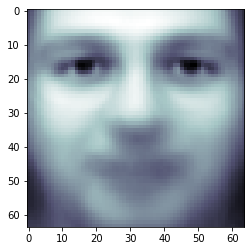

In [21]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)
plt.show()

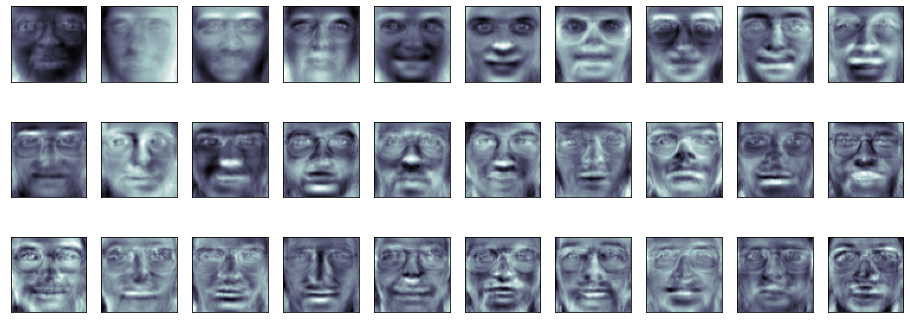

In [38]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

In [23]:
# Application de la transformation aux données d’entraînement
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

(320, 150)


In [24]:
# Application de la transformation aux données d’entraînement
X_test_pca  = pca.transform(X_test)
print(X_test_pca.shape)

(80, 150)


Les données doivent effectivement être centrées ; le ACP le fait cependant automatiquement ; il n'y a donc pas besoin de le faire explicitement.

## 5 - Classification avec différents classifieurs des données tranformées à l'aide de la méthode ACP

#### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 62.50%


- Accuracy sans ACP : 87.50%
- Accuracy avec ACP : 61.65%

Pour le classifieur KNN, on obtient donc une meilleure accuracy sans ACP.

#### Régression logistique

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none', solver='newton-cg')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 92.50%


- Accuracy sans ACP : 95.00%
- Accuracy avec ACP : 92.50%

Pour le classifieur Régression Linéaire, on obtient également une meilleure accuracy sans ACP, bien que faiblement.

#### SVM

In [27]:
from sklearn.svm           import SVC
from sklearn.pipeline      import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('accuracy : {:.2%}'.format(accuracy_score(y_test, y_pred)))

accuracy : 92.50%


- Accuracy sans ACP : 92.50%
- Accuracy avec ACP : 93.75%

Pour le classifieur SVM, on obtient cette fois une meilleure accuracy avec ACP, bien que faiblement meilleure.

On remarque donc ici que seule la classification avec SVM est meilleure avec l'application de la méthode ACP.

## 6 - Recherche de nombre de composantes principales donnant le meilleur score sur le jeu de test

In [28]:
import pandas as pd

#### KNN

In [29]:
# Création d'un tableau répertoriant les résultats obtenus avec le classifieur KNN
df_accuracy_score_KNN = pd.DataFrame(columns=['number_of_components', 'accuracy'])

# Exploration des scores obtenus en fonction du nombre de composantes principales (eigenfaces) 
# utilisées pour la méthode ACP
for n in range(1, 320, 10): # start, stop, step
    pca = decomposition.PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)

    clf = KNeighborsClassifier()
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    newRow = pd.DataFrame({'number_of_components': n, 'accuracy': round(accuracy_score(y_test, y_pred),2)}, index=[0])
        
    df_accuracy_score_KNN = pd.concat([df_accuracy_score_KNN, newRow], ignore_index=True, axis=0)
    
df_accuracy_score_KNN

,number_of_components,accuracy
0,1,0.24
1,11,0.85
2,21,0.86
3,31,0.86
4,41,0.85
5,51,0.85
6,61,0.76
7,71,0.8
8,81,0.75
9,91,0.71


La valeur maximale de l'accuracy trouvée ici est donc de 0.88, avec 21 composantes principales.

#### Régression logistique

In [30]:
# Création d'un tableau répertoriant les résultats obtenus avec le classifieur KNN
df_accuracy_score_LinReg = pd.DataFrame(columns=['number_of_components', 'accuracy'])

# Exploration des scores obtenus en fonction du nombre de composantes principales (eigenfaces) 
# utilisées pour la méthode ACP
for n in range(1, 320, 10): # start, stop, step
    pca = decomposition.PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)

    clf = LogisticRegression(penalty='none', solver='newton-cg')
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    newRow = pd.DataFrame({'number_of_components': n, 'accuracy': round(accuracy_score(y_test, y_pred), 2)}, index=[0])
        
    df_accuracy_score_LinReg = pd.concat([df_accuracy_score_LinReg, newRow], ignore_index=True, axis=0)

df_accuracy_score_LinReg

C:\Users\Helpdesk\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Helpdesk\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


,number_of_components,accuracy
0,1,0.12
1,11,0.91
2,21,0.94
3,31,0.96
4,41,0.96
5,51,0.98
6,61,0.94
7,71,0.94
8,81,0.92
9,91,0.92


La valeur maximale de l'accuracy trouvée ici est donc de 0.96, avec 31 composantes principales.

#### SVM

In [31]:
# Création d'un tableau répertoriant les résultats obtenus avec le classifieur KNN
df_accuracy_score_SVM = pd.DataFrame(columns=['number_of_components', 'accuracy'])

# Exploration des scores obtenus en fonction du nombre de composantes principales (eigenfaces) 
# utilisées pour la méthode ACP
for n in range(1, 320, 10): # start, stop, step
    pca = decomposition.PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)

    clf = make_pipeline(StandardScaler(), SVC())
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    newRow = pd.DataFrame({'number_of_components': n, 'accuracy': round(accuracy_score(y_test, y_pred), 2)}, index=[0])
        
    df_accuracy_score_SVM = pd.concat([df_accuracy_score_SVM, newRow], ignore_index=True, axis=0)

df_accuracy_score_SVM

,number_of_components,accuracy
0,1,0.18
1,11,0.9
2,21,0.92
3,31,0.94
4,41,0.96
5,51,0.96
6,61,0.95
7,71,0.95
8,81,0.92
9,91,0.94


La valeur maximale de l'accuracy trouvée ici est donc de 0.98, avec 41 composantes principales.

## 7 - Affichage des 5 premières erreurs de classification pour le meilleur système obtenu avec : 
- l’image mal classée 
- une image de la personne supposée par le système, et
- une image de la personne correcte

*Notons premièrement que le meilleur système obtenu est le **classifieur SVM avec 41 composantes principales** pour la méthode ACP*

In [32]:
pca = decomposition.PCA(n_components=41, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

### Premières erreurs

In [33]:
import numpy as np
tab = np.where(y_pred!=y_test)[0]

In [34]:
tab.size

3

On remarque qu'il n'y a que deux indices dans le tableau d'images mal classées ; il y'a donc seulement deux images qui ont été mal classées. Affichons-les donc : 

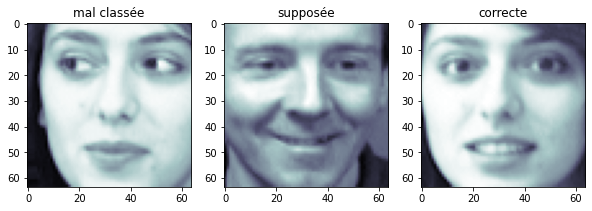

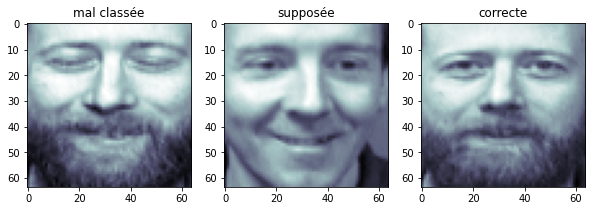

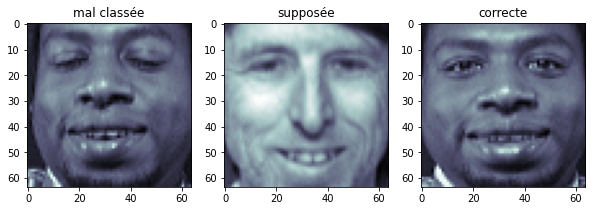

In [35]:
for i in tab:

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
    
    ax1.imshow(X_test[i].reshape(64,64), cmap=plt.cm.bone)
    ax1.set_title("mal classée")

    ax2.imshow(faces.images[10*y_pred[i]], cmap=plt.cm.bone)
    ax2.set_title("supposée")

    ax3.imshow(faces.images[10*y_test[i]], cmap=plt.cm.bone)
    ax3.set_title("correcte")

    plt.show()

- Pour la première erreur, on remarque une faible similitude entre les nez et yeux des deux personnes. Aussi, elles ont la même couleur de peau. Pour l'oeil humain, il n'y a aucune ambiguïté quant au fait que ces deux personnes sont différentes. Si on veut citer des traits de différence, il y a par exemple la bouche et les dents ;


- Pour la deuxième erreur, il est évident à l'oeil humain qu'il ne s'agit pas de la même personne : le nez, les sourcis, les lèvres et la couleur de peau sont différent.e.s. En ce qui concerne les similitudes, ces deux personnes semblent avoir une forme ressemblante d'yeux.
